In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts

In [2]:
batch_size=32
num_classes=10

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


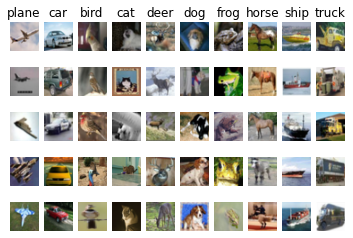

In [4]:
import matplotlib.pyplot as plt

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1024,activation='relu'))
model.add(Dense(units=1024,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
x_val=x_train[:5000]
y_val=y_train[:5000]

In [10]:
x_train=x_train[5000:]
y_train=y_train[5000:]

In [11]:
print(x_val.shape)
print(x_train.shape)

(5000, 32, 32, 3)
(45000, 32, 32, 3)


In [22]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 10,
                              restore_best_weights = True)

In [23]:
#learning decay

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_decay=LearningRateScheduler(scheduler)

In [24]:
callback_lists=[earlystopping,lr_decay]

In [25]:
history=model.fit(x_train,y_train , epochs=50, batch_size=batch_size, validation_data=(x_val,y_val),callbacks=[callback_lists],verbose =1, shuffle=True)

Epoch 1/50
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5036 - accuracy: 0.4686 - val_loss: 1.1495 - val_accuracy: 0.5946 - lr: 0.0010
Epoch 2/50
1407/1407 [==============================] - 12s 9ms/step - loss: 1.0201 - accuracy: 0.6408 - val_loss: 1.1289 - val_accuracy: 0.6124 - lr: 0.0010
Epoch 3/50
1407/1407 [==============================] - 12s 9ms/step - loss: 0.8314 - accuracy: 0.7081 - val_loss: 0.8675 - val_accuracy: 0.6950 - lr: 0.0010
Epoch 4/50
1407/1407 [==============================] - 12s 9ms/step - loss: 0.7296 - accuracy: 0.7481 - val_loss: 0.9409 - val_accuracy: 0.6844 - lr: 0.0010
Epoch 5/50
1407/1407 [==============================] - 12s 9ms/step - loss: 0.6426 - accuracy: 0.7762 - val_loss: 0.6709 - val_accuracy: 0.7724 - lr: 0.0010
Epoch 6/50
1407/1407 [==============================] - 12s 9ms/step - loss: 0.5762 - accuracy: 0.8008 - val_loss: 0.7306 - val_accuracy: 0.7560 - lr: 0.0010
Epoch 7/50
1407/1407 [==============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


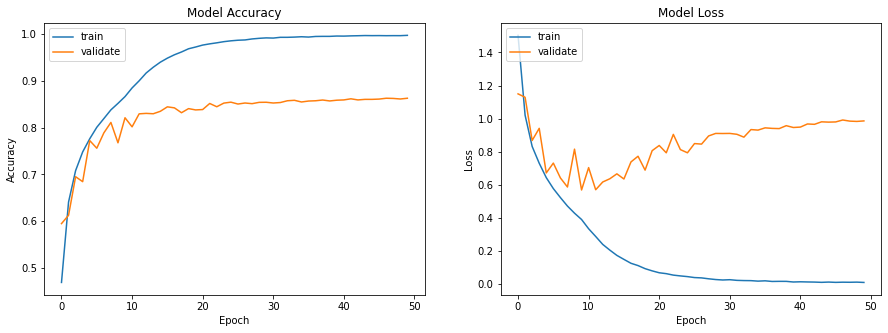

In [26]:
import matplotlib.pyplot as plt

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [27]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1459 - accuracy: 0.8512
Test loss: 1.1458898782730103
Test accuracy: 0.8511999845504761


**Test Accuracy : 0.85119**